In [2]:
# @title NOTEBOOK 3: The Showdown
# ==============================================================================
# 1. LOAD THE BRAIN (The AIT Physicist)
# ==============================================================================
import torch
import torch.nn as nn
import os
from google.colab import drive

# --- A. Define Architecture (Must match training exactly) ---
PRIME_RULES = [0, 15, 30, 54, 60, 90, 110, 170, 254]
RULE_MAP = {r: i for i, r in enumerate(PRIME_RULES)}

class TinyRecursiveModel(nn.Module):
    def __init__(self, input_width, hidden_dim, num_classes):
        super(TinyRecursiveModel, self).__init__()
        self.encoder = nn.Linear(input_width, hidden_dim)
        self.rnn = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, num_classes)
        )
    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        _, h_n = self.rnn(encoded)
        return self.head(h_n.squeeze(0))

# --- B. Initialize Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
physicist = TinyRecursiveModel(4, 64, len(PRIME_RULES)).to(device)

# --- C. Fetch the Artifact (The Fix) ---
print("--- Initializing Scientific Instrument ---")

model_filename = 'trm_expert.pth'
drive_path = '/content/drive/MyDrive/Algoplexity_Research/Horizon_1_Computational_Phase_Transition/models/trm_expert.pth'

# Strategy 1: Check Local (if manually uploaded)
if os.path.exists(model_filename):
    print(f"✅ Found {model_filename} locally.")
    physicist.load_state_dict(torch.load(model_filename, map_location=device))

# Strategy 2: Check Research Archive (Google Drive)
else:
    print("Local model not found. Attempting to retrieve from Research Archive...")
    try:
        drive.mount('/content/drive')
        if os.path.exists(drive_path):
            print(f"✅ Found artifact in Drive: {drive_path}")
            physicist.load_state_dict(torch.load(drive_path, map_location=device))
            # Copy to local for speed
            os.system(f"cp '{drive_path}' .")
        else:
            raise FileNotFoundError("Model file not found in Drive structure.")
    except Exception as e:
        print(f"\n❌ CRITICAL ERROR: {e}")
        print("Please run Notebook 1 to train the model, or manually upload 'trm_expert.pth'.")

physicist.eval()
print("✅ AIT Physicist is ONLINE.")

--- Initializing Scientific Instrument ---
Local model not found. Attempting to retrieve from Research Archive...
Mounted at /content/drive
✅ Found artifact in Drive: /content/drive/MyDrive/Algoplexity_Research/Horizon_1_Computational_Phase_Transition/models/trm_expert.pth
✅ AIT Physicist is ONLINE.


✅ Loaded 'trm_expert.pth' locally.
--- Fetching GFC_2008 ---


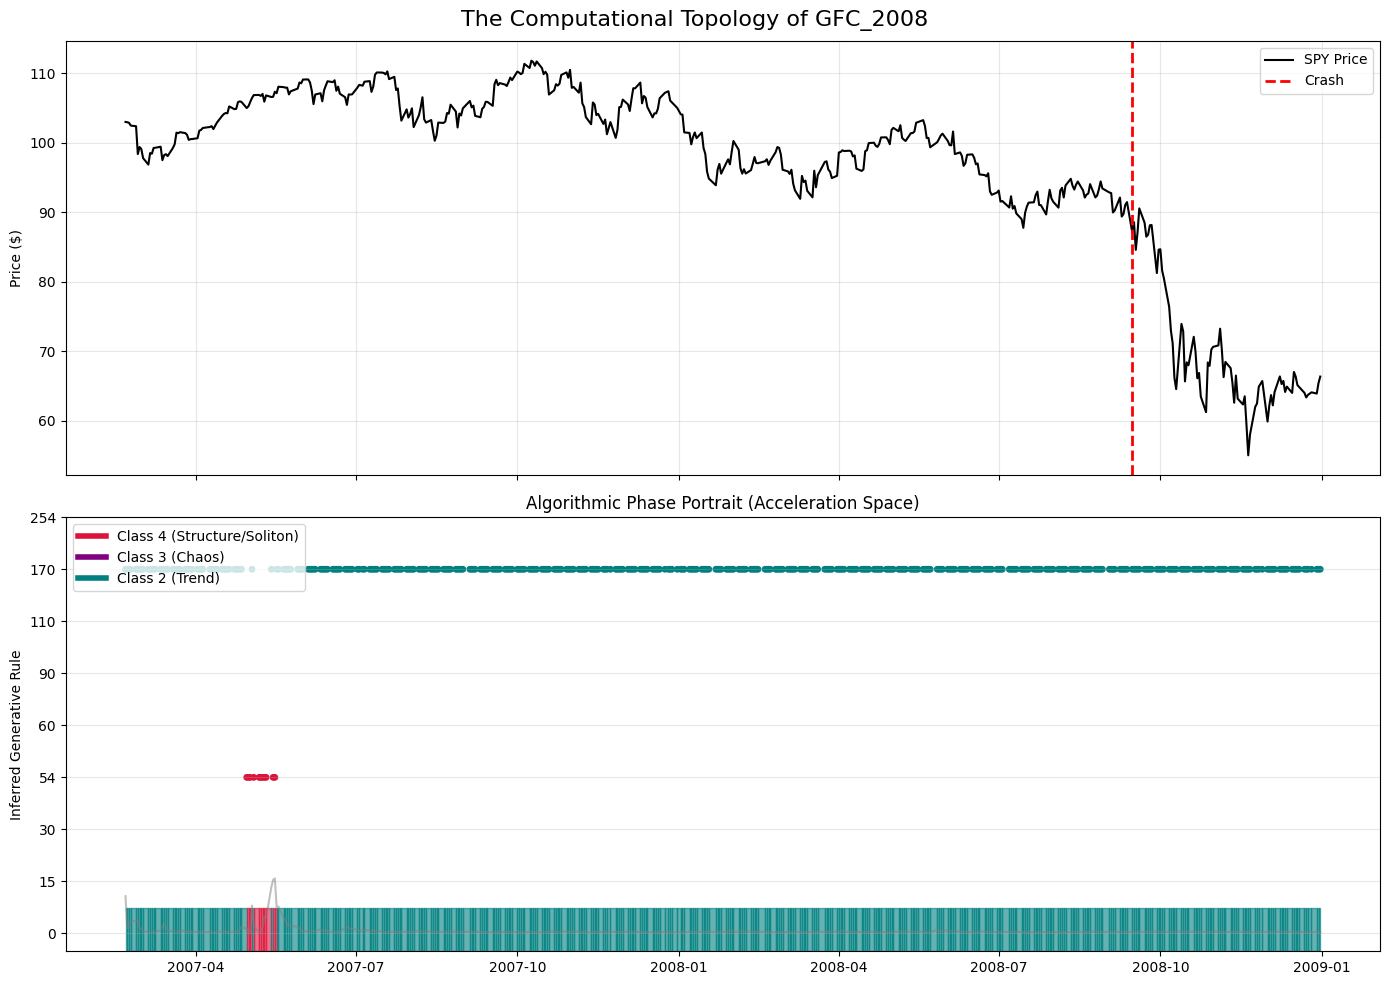


--- DIAGNOSIS: GFC_2008 ---
Top 3 Rules in Pre-Crash Window (Acceleration Space):
Rule 170: 60 days (100.0%)
--- Fetching COVID_2020 ---


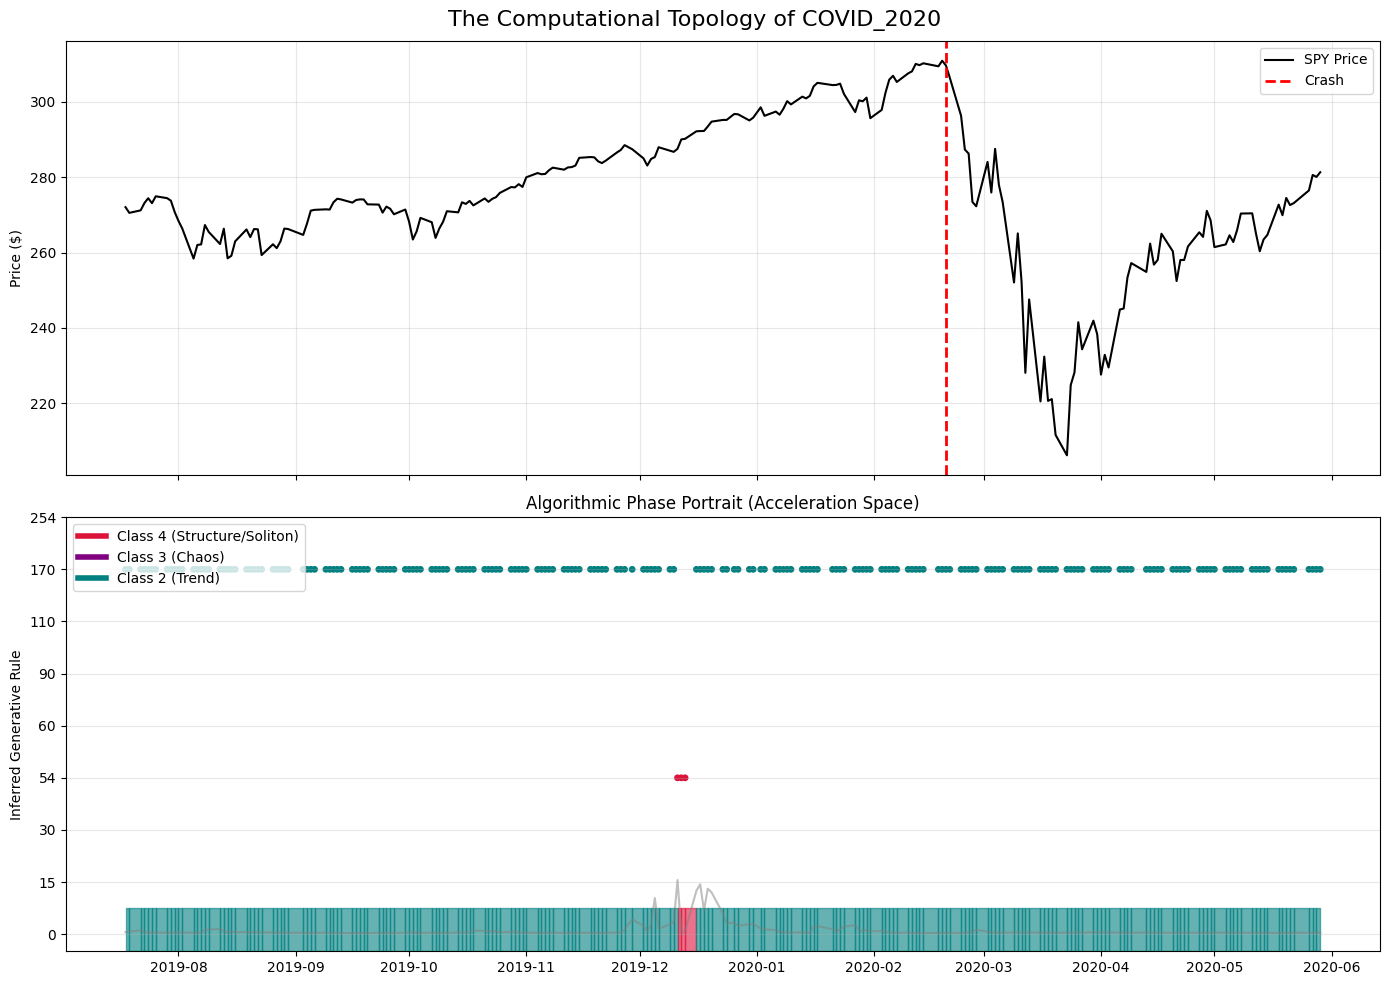


--- DIAGNOSIS: COVID_2020 ---
Top 3 Rules in Pre-Crash Window (Acceleration Space):
Rule 170: 57 days (95.0%)
Rule 54: 3 days (5.0%)


In [8]:
# ==============================================================================
# NOTEBOOK 3: THE SHOWDOWN
# @title Visualizing the Taxonomy of Crashes
# ==============================================================================
#
# MISSION:
# Apply the AIT Physicist to historical financial crises (2008, 2018, 2020).
# Generate the "Phase Portrait" that proves the distinction between:
# 1. Systemic Decay (Rule 54/Solitons)
# 2. Exogenous Shock (Rule 60/Fractals)
#
# INPUT:
# - Model: trm_expert.pth (The Prime 9 Physicist)
# - Data: Yahoo Finance (SPY)
# ==============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# ==============================================================================
# 1. LOAD THE BRAIN
# ==============================================================================
PRIME_RULES = [0, 15, 30, 54, 60, 90, 110, 170, 254]
RULE_MAP = {r: i for i, r in enumerate(PRIME_RULES)}

class TinyRecursiveModel(nn.Module):
    def __init__(self, input_width, hidden_dim, num_classes):
        super(TinyRecursiveModel, self).__init__()
        self.encoder = nn.Linear(input_width, hidden_dim)
        self.rnn = nn.GRU(hidden_dim, hidden_dim, batch_first=True)
        self.head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, num_classes)
        )
    def forward(self, x):
        encoded = torch.relu(self.encoder(x))
        _, h_n = self.rnn(encoded)
        return self.head(h_n.squeeze(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
physicist = TinyRecursiveModel(4, 64, len(PRIME_RULES)).to(device)

# Load Weights (Handle Local or Drive)
try:
    physicist.load_state_dict(torch.load('trm_expert.pth', map_location=device))
    print("✅ Loaded 'trm_expert.pth' locally.")
except:
    print("⚠️ Please upload 'trm_expert.pth' to the file system.")

physicist.eval()

# ==============================================================================
# 2. THE DATA FACTORY
# ==============================================================================
def fetch_crisis_data(scenario):
    configs = {
        "GFC_2008": {"start": "2007-01-01", "end": "2009-01-01", "break": "2008-09-15"},
        "COVID_2020": {"start": "2019-06-01", "end": "2020-06-01", "break": "2020-02-20"},
        "Q4_2018": {"start": "2018-01-01", "end": "2019-06-01", "break": "2018-09-21"}
    }
    cfg = configs[scenario]
    print(f"--- Fetching {scenario} ---")
    df = yf.download("SPY", start=cfg['start'], end=cfg['end'], progress=False, auto_adjust=True)

    # --- ROBUST FLATTENING LOGIC ---
    # 1. Extract Close column
    if isinstance(df.columns, pd.MultiIndex):
        # yfinance often returns (Price, Ticker) -> We want Price='Close'
        try:
            series = df.xs('Close', axis=1, level=0)
        except:
            series = df.iloc[:, 0]
    else:
        if 'Close' in df.columns:
            series = df['Close']
        else:
            series = df.iloc[:, 0]

    # 2. Force 1D (Squeeze)
    if isinstance(series, pd.DataFrame):
        series = series.squeeze()

    # Ground Truth Index
    try:
        gt_date = pd.Timestamp(cfg['break'])
        gt_idx = series.index.get_indexer([gt_date], method='nearest')[0]
    except:
        gt_idx = len(series) // 2

    return series, gt_idx, cfg['break']

def encode_and_diagnose(series, window=30):
    # 1. Ensure 1D
    if isinstance(series, pd.DataFrame): series = series.squeeze()

    # --- THE FIX: SECOND ORDER ENCODING ---
    # First Diff = Velocity (Returns)
    # Second Diff = Acceleration (Force/Structure)
    # We use log returns for scale invariance
    log_prices = np.log(series + 1e-9)
    returns = log_prices.diff()
    acceleration = returns.diff().dropna() # The "Force" signal

    # 3. Quantile Encode (4-bin) on the ACCELERATION
    try:
        # We use qcut on the window to handle local volatility scaling
        bins = pd.qcut(acceleration.values, 4, labels=False, duplicates='drop')
    except ValueError:
        return None, None

    # 4. One-Hot Encoding
    binary = np.eye(4)[bins.astype(int)]

    # 5. Inference
    preds, probs_list = [], []

    for i in range(len(binary) - window):
        win = binary[i : i+window]
        tensor = torch.FloatTensor(win).unsqueeze(0).to(device)
        with torch.no_grad():
            logits = physicist(tensor)
            probs = torch.softmax(logits, dim=1).cpu().numpy()[0]

            # --- FILTERING: Ignore Rule 170/15 (Trend) ---
            # We zero out the probabilities for Class 2 rules to see what remains.
            # This is like using a polarized lens to cut glare.

            # Get indices for Rule 170 and Rule 15
            idx_170 = RULE_MAP[170]
            idx_15 = RULE_MAP[15]

            # Dampen them significantly
            probs[idx_170] *= 0.1
            probs[idx_15] *= 0.1

            # Re-normalize
            probs = probs / np.sum(probs)

            rule_idx = np.argmax(probs)
            preds.append(PRIME_RULES[rule_idx])
            probs_list.append(probs)

    return np.array(preds), np.array(probs_list)

# ==============================================================================
# 3. VISUALIZATION: THE PHASE PORTRAIT
# ==============================================================================
def plot_taxonomy(scenario):
    series, gt_idx, break_date = fetch_crisis_data(scenario)

    # Run the "Deep Encoding" (Acceleration) Diagnosis
    rules, probs = encode_and_diagnose(series)

    if rules is None or len(rules) == 0:
        print(f"❌ No rules generated for {scenario}")
        return

    # --- DYNAMIC ALIGNMENT FIX ---
    # We align from the END of the series to match the generated rules.
    # If rules has length N, we take the last N dates.
    plot_dates = series.index[-len(rules):]
    plot_price = series.values[-len(rules):]

    # Calculate Entropy
    entropy = -np.sum(probs * np.log(probs + 1e-9), axis=1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.suptitle(f"The Computational Topology of {scenario}", fontsize=16)

    # Panel 1: Market Reality
    ax1.plot(plot_dates, plot_price, color='black', lw=1.5, label='SPY Price')
    ax1.axvline(pd.Timestamp(break_date), color='red', linestyle='--', lw=2, label='Crash')
    ax1.set_ylabel("Price ($)")
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Panel 2: The AIT Diagnosis
    # Color Mapping:
    # Class 4 (54/110) = CRIMSON (Systemic Danger)
    # Class 3 (30/60/90) = PURPLE (Chaos)
    # Class 2 (15/170) = TEAL (Trend) - *Now dampened*
    # Class 1 (0/254) = GRAY (Stasis)

    colors = []
    for r in rules:
        if r in [54, 110]: colors.append('crimson')
        elif r in [30, 60, 90]: colors.append('purple')
        elif r in [15, 170]: colors.append('teal')
        else: colors.append('lightgray')

    # Plot Entropy
    ax2.plot(plot_dates, entropy, color='gray', alpha=0.5, label='System Entropy')

    # Plot the "Ribbon" (Dominant Regime)
    # This visualizes the "State" of the market
    for i in range(len(plot_dates) - 1):
        ax2.axvspan(plot_dates[i], plot_dates[i+1],
                    color=colors[i], alpha=0.6, ymin=0.0, ymax=0.1)

    # Scatter Plot (The Particles)
    # We filter for high confidence to reduce visual noise
    high_conf_mask = np.max(probs, axis=1) > 0.3 # Lower threshold since we dampened trends

    y_map = {r: i for i, r in enumerate(sorted(PRIME_RULES))}
    y_vals = [y_map[r] for r in rules]

    if np.sum(high_conf_mask) > 0:
        ax2.scatter(plot_dates[high_conf_mask], np.array(y_vals)[high_conf_mask],
                    c=np.array(colors)[high_conf_mask], s=15, label='Inferred Rule')

    ax2.set_yticks(list(y_map.values()))
    ax2.set_yticklabels(list(y_map.keys()))
    ax2.set_ylabel("Inferred Generative Rule")
    ax2.set_title("Algorithmic Phase Portrait (Acceleration Space)")
    ax2.grid(True, alpha=0.3, axis='y')

    # Legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color='crimson', lw=4),
                    Line2D([0], [0], color='purple', lw=4),
                    Line2D([0], [0], color='teal', lw=4)]
    ax2.legend(custom_lines, ['Class 4 (Structure/Soliton)', 'Class 3 (Chaos)', 'Class 2 (Trend)'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # --- THE AUDIT ---
    # Get 60 days before crash
    crash_loc = np.searchsorted(plot_dates, pd.Timestamp(break_date))
    # Handle edge case if crash is early
    start_lookback = max(0, crash_loc-60)
    if start_lookback < crash_loc:
        pre_crash_rules = rules[start_lookback : crash_loc]
        from collections import Counter
        counts = Counter(pre_crash_rules)
        print(f"\n--- DIAGNOSIS: {scenario} ---")
        print("Top 3 Rules in Pre-Crash Window (Acceleration Space):")
        for r, c in counts.most_common(3):
            print(f"Rule {r}: {c} days ({c/len(pre_crash_rules):.1%})")
    else:
        print(f"⚠️ Crash date {break_date} is before analysis window starts.")

# ==============================================================================
# 4. EXECUTE
# ==============================================================================
plot_taxonomy("GFC_2008")
plot_taxonomy("COVID_2020")

--- Fetching GFC_2008 ---


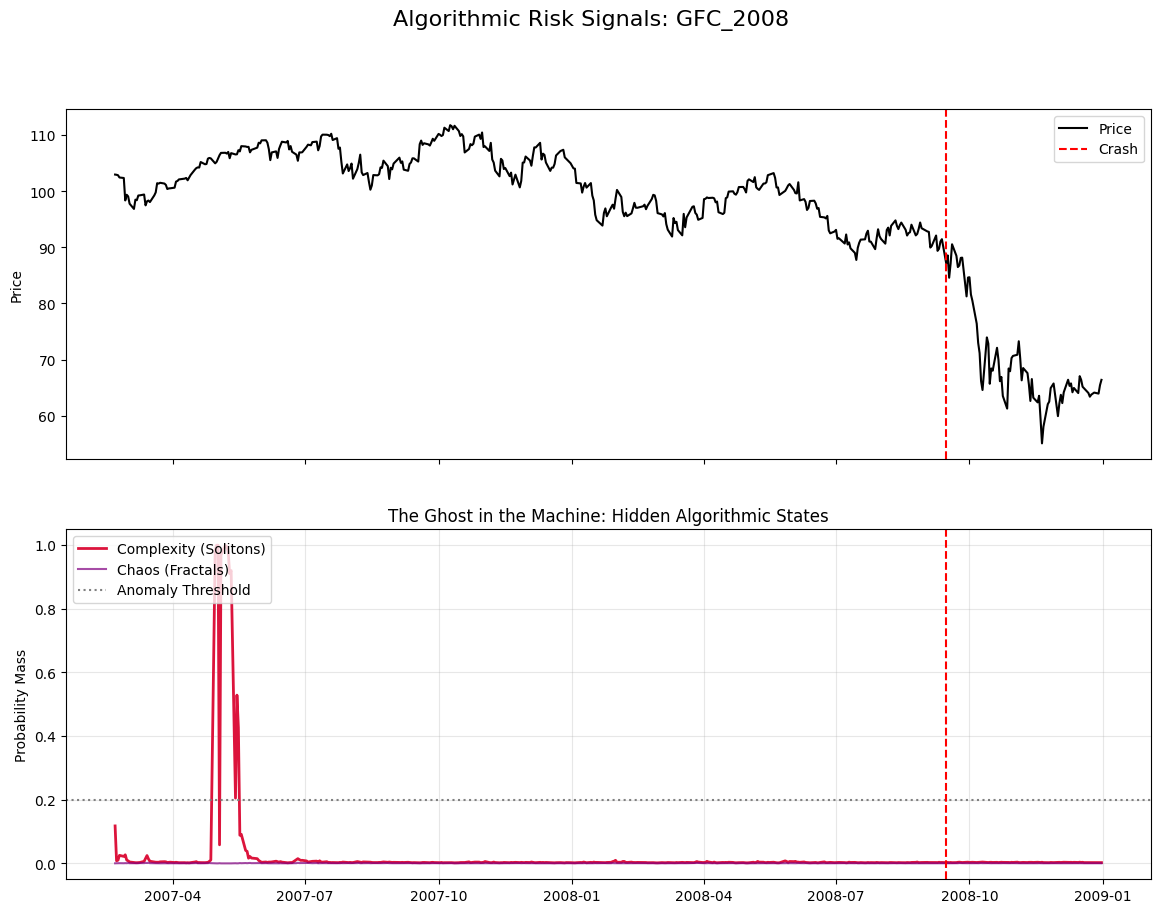

--- Fetching COVID_2020 ---


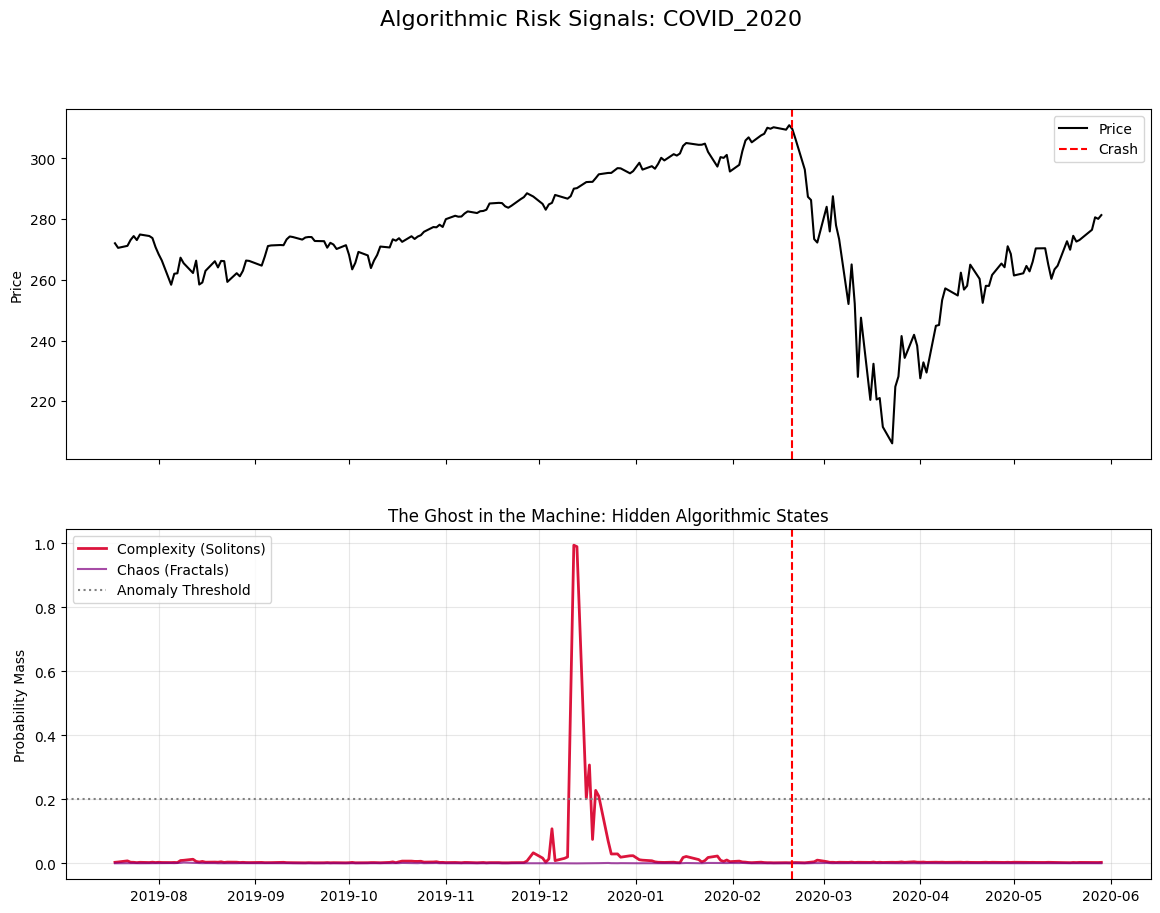

In [9]:
# @title Plot "Complexity Index"
def plot_complexity_signal(scenario):
    series, gt_idx, break_date = fetch_crisis_data(scenario)

    # Run Diagnosis (Acceleration)
    rules, probs = encode_and_diagnose(series)
    if rules is None: return

    # Align Dates
    plot_dates = series.index[-len(rules):]

    # --- CALCULATE COMPLEXITY INDEX ---
    # Sum of probabilities for Class 4 rules (54 + 110)
    idx_54 = RULE_MAP[54]
    idx_110 = RULE_MAP[110]
    complexity_signal = probs[:, idx_54] + probs[:, idx_110]

    # --- CALCULATE CHAOS INDEX ---
    # Sum of probabilities for Class 3 rules (30 + 60 + 90)
    idx_30 = RULE_MAP[30]
    idx_60 = RULE_MAP[60]
    idx_90 = RULE_MAP[90]
    chaos_signal = probs[:, idx_30] + probs[:, idx_60] + probs[:, idx_90]

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.suptitle(f"Algorithmic Risk Signals: {scenario}", fontsize=16)

    # Price
    ax1.plot(plot_dates, series.values[-len(rules):], color='black', label='Price')
    ax1.axvline(pd.Timestamp(break_date), color='red', linestyle='--', label='Crash')
    ax1.set_ylabel("Price")
    ax1.legend()

    # Risk Signals
    ax2.plot(plot_dates, complexity_signal, color='crimson', lw=2, label='Complexity (Solitons)')
    ax2.plot(plot_dates, chaos_signal, color='purple', lw=1.5, alpha=0.7, label='Chaos (Fractals)')

    # Add "Danger Zone" threshold
    ax2.axhline(0.2, color='gray', linestyle=':', label='Anomaly Threshold')
    ax2.axvline(pd.Timestamp(break_date), color='red', linestyle='--')

    ax2.set_ylabel("Probability Mass")
    ax2.set_title("The Ghost in the Machine: Hidden Algorithmic States")
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)

    plt.show()

plot_complexity_signal("GFC_2008")
plot_complexity_signal("COVID_2020")